# Análisis del Perfil de LinkedIn de Inverbyte

Este proyecto realiza un análisis detallado del perfil de LinkedIn del dueño de Inverbyte. Utilizando herramientas de análisis de datos como Python y pandas, se extraen insights para optimizar su presentación profesional y destacar aspectos clave del perfil en la plataforma. El resultado del análisis se presenta en un Dashboard interactivo en Tableau.

## Descripción del Proyecto
El proyecto se inició con la entrega de 38 datasets por parte del dueño de Inverbyte. Después de revisar el contenido de cada uno, se seleccionaron los datasets con la mayor cantidad de información relevante. El análisis se centró principalmente en el dataset `messages`, que contenía información sobre las conversaciones mantenidas a través de LinkedIn.

## Resultados
Los resultados del análisis se resumen en un Dashboard interactivo creado en Tableau, que incluye:
1. Nube de Palabras: Muestra las palabras más repetidas en los mensajes, proporcionando insights sobre los temas más discutidos.
2. Top de Remitentes: Lista de los remitentes más frecuentes en las conversaciones.
3. Duración de las Conversaciones: Tiempo promedio de duración de las conversaciones en LinkedIn.
4. Frecuencia de Mensajes: Gráfico que muestra cómo varía la cantidad de mensajes enviados a lo largo del tiempo.


# Análisis del Perfil de LinkedIn de Inverbyte

Este proyecto realiza un análisis detallado del perfil de LinkedIn del dueño de Inverbyte. Utilizando herramientas de análisis de datos como Python y pandas, se extraen insights para optimizar su presentación profesional y destacar aspectos clave del perfil en la plataforma. El resultado del análisis se presenta en un Dashboard interactivo en Tableau.

## Descripción del Proyecto
El proyecto se inició con la entrega de 38 datasets por parte del dueño de Inverbyte. Después de revisar el contenido de cada uno, se seleccionaron los datasets con la mayor cantidad de información relevante. El análisis se centró principalmente en el dataset `messages`, que contenía información sobre las conversaciones mantenidas a través de LinkedIn.

## Resultados
Los resultados del análisis se resumen en un Dashboard interactivo creado en Tableau, que incluye:
1. Nube de Palabras: Muestra las palabras más repetidas en los mensajes, proporcionando insights sobre los temas más discutidos.
2. Top de Remitentes: Lista de los remitentes más frecuentes en las conversaciones.
3. Duración de las Conversaciones: Tiempo promedio de duración de las conversaciones en LinkedIn.
4. Frecuencia de Mensajes: Gráfico que muestra cómo varía la cantidad de mensajes enviados a lo largo del tiempo.


In [1]:
# Importación de bibliotecas necesarias para el análisis de datos
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
%matplotlib inline

In [2]:
# Carga del archivo CSV con los datos de mensajes para su análisis
df=pd.read_csv('messages.csv')

In [3]:
# Muestra las primeras 5 filas del DataFrame para tener una vista rápida de los datos.
df.head()

,CONVERSATION ID,CONVERSATION TITLE,FROM,SENDER PROFILE URL,TO,RECIPIENT PROFILE URLS,DATE,SUBJECT,CONTENT,FOLDER
0,2-ZTVjMTdiYWYtZWY0NC00MTcyLWFhNzgtZjk4YzdjNWU5...,NaN,Mark Suárez,https://www.linkedin.com/in/marcosuareztv,Veronica BANDE,https://www.linkedin.com/in/veronica-bande,2024-09-17 18:21:23 UTC,NaN,👍,INBOX
1,2-ZTVjMTdiYWYtZWY0NC00MTcyLWFhNzgtZjk4YzdjNWU5...,NaN,Veronica BANDE,https://www.linkedin.com/in/veronica-bande,Mark Suárez,https://www.linkedin.com/in/marcosuareztv,2024-09-16 14:04:05 UTC,NaN,"Igualmente, Mark",INBOX
2,2-ZTVjMTdiYWYtZWY0NC00MTcyLWFhNzgtZjk4YzdjNWU5...,NaN,Mark Suárez,https://www.linkedin.com/in/marcosuareztv,Veronica BANDE,https://www.linkedin.com/in/veronica-bande,2024-09-16 14:03:37 UTC,NaN,Saluditos,INBOX
3,2-ZTE0YWFiMzItOGE5Yi00NTJjLTllYTQtMmU5MGIyZjk1...,NaN,Francisco Deustua,https://www.linkedin.com/in/franciscodeustua,Mark Suárez,https://www.linkedin.com/in/marcosuareztv,2024-09-17 13:19:01 UTC,NaN,Hola Mark ¿Como estas? Quería molestarte y tra...,INBOX
4,2-MTNkOGMxODMtNTI4OC00MTM2LTgyMGUtMzM1MWM3OTFi...,NaN,Maria Infantino,https://www.linkedin.com/in/maria-infantino-37...,Mark Suárez,https://www.linkedin.com/in/marcosuareztv,2024-09-16 16:49:34 UTC,NaN,"Hola Mark, este mensaje es para notificarle qu...",INBOX


In [4]:
# Muestra la forma del DataFrame, es decir, el número de filas y columnas.
df.shape

(1098, 10)

In [5]:
# Proporciona un resumen informativo del DataFrame, incluyendo el número de entradas, nombres de columnas, tipos de datos y valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CONVERSATION ID         1098 non-null   object
 1   CONVERSATION TITLE      79 non-null     object
 2   FROM                    1098 non-null   object
 3   SENDER PROFILE URL      953 non-null    object
 4   TO                      1095 non-null   object
 5   RECIPIENT PROFILE URLS  1044 non-null   object
 6   DATE                    1098 non-null   object
 7   SUBJECT                 7 non-null      object
 8   CONTENT                 1083 non-null   object
 9   FOLDER                  1090 non-null   object
dtypes: object(10)
memory usage: 85.9+ KB


In [6]:
# Cuenta el número de valores nulos (NaN) en cada columna del DataFrame.
df.isna().sum()


CONVERSATION ID              0
CONVERSATION TITLE        1019
FROM                         0
SENDER PROFILE URL         145
TO                           3
RECIPIENT PROFILE URLS      54
DATE                         0
SUBJECT                   1091
CONTENT                     15
FOLDER                       8
dtype: int64

In [7]:
# Elimina las columnas 'CONVERSATION TITLE' y 'SUBJECT' del DataFrame, 
# ya que se consideran innecesarias para el análisis.
cleaned_df = df.drop(columns=['CONVERSATION TITLE', 'SUBJECT'])

# Calcula el número de valores nulos en cada columna del DataFrame limpio.
missing_data_summary = cleaned_df.isnull().sum()

# Muestra el resumen de los datos faltantes para cada columna.
missing_data_summary

CONVERSATION ID             0
FROM                        0
SENDER PROFILE URL        145
TO                          3
RECIPIENT PROFILE URLS     54
DATE                        0
CONTENT                    15
FOLDER                      8
dtype: int64

In [8]:
# Elimina las filas del DataFrame donde las columnas 'TO' o 'CONTENT' tienen valores nulos.
cleaned_df = cleaned_df.dropna(subset=['TO', 'CONTENT'])

In [9]:
# Calcula el número de valores nulos en cada columna del DataFrame después de la limpieza.
missing_data_after_cleanup = cleaned_df.isnull().sum()

# Muestra el resumen de los datos faltantes en cada columna después de la limpieza.
missing_data_after_cleanup

CONVERSATION ID             0
FROM                        0
SENDER PROFILE URL        144
TO                          0
RECIPIENT PROFILE URLS     51
DATE                        0
CONTENT                     0
FOLDER                      8
dtype: int64

In [10]:
# Rellena los valores nulos en la columna 'FOLDER' con el valor 'INBOX'.
cleaned_df['FOLDER'] = cleaned_df['FOLDER'].fillna('INBOX')

# Calcula el número de valores nulos en cada columna del DataFrame después de rellenar los valores faltantes.
missing_data_after_fill = cleaned_df.isnull().sum()

# Muestra el resumen de los datos faltantes en cada columna después de rellenar los valores nulos.
missing_data_after_fill

CONVERSATION ID             0
FROM                        0
SENDER PROFILE URL        144
TO                          0
RECIPIENT PROFILE URLS     51
DATE                        0
CONTENT                     0
FOLDER                      0
dtype: int64

In [11]:
# Proporciona un resumen del DataFrame después de la limpieza, mostrando el número de entradas, 
# los nombres de las columnas, los tipos de datos y la cantidad de valores no nulos.
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0 to 1097
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CONVERSATION ID         1080 non-null   object
 1   FROM                    1080 non-null   object
 2   SENDER PROFILE URL      936 non-null    object
 3   TO                      1080 non-null   object
 4   RECIPIENT PROFILE URLS  1029 non-null   object
 5   DATE                    1080 non-null   object
 6   CONTENT                 1080 non-null   object
 7   FOLDER                  1080 non-null   object
dtypes: object(8)
memory usage: 75.9+ KB


In [37]:
# Convierte la columna 'DATE' a un objeto de tipo datetime, 
# manejando cualquier error convirtiendo los valores problemáticos en NaT (Not a Time).
cleaned_df['DATE'] = pd.to_datetime(cleaned_df['DATE'], errors='coerce')


In [13]:
# Proporciona un resumen del DataFrame después de convertir la columna 'DATE' al formato datetime,
# mostrando el número de entradas, nombres de columnas, tipos de datos y la cantidad de valores no nulos.
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0 to 1097
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   CONVERSATION ID         1080 non-null   object             
 1   FROM                    1080 non-null   object             
 2   SENDER PROFILE URL      936 non-null    object             
 3   TO                      1080 non-null   object             
 4   RECIPIENT PROFILE URLS  1029 non-null   object             
 5   DATE                    1080 non-null   datetime64[ns, UTC]
 6   CONTENT                 1080 non-null   object             
 7   FOLDER                  1080 non-null   object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 75.9+ KB


In [38]:
# Exporta el DataFrame limpio a un archivo CSV llamado 'tableau_ana.csv',
# sin incluir el índice de las filas en el archivo exportado.
cleaned_df.to_csv('tableau_ana.csv', index=False)

In [39]:
# Cuenta el número de mensajes que están en la carpeta 'ARCHIVE' en el DataFrame.
archived_messages_count = cleaned_df[cleaned_df['FOLDER'] == 'ARCHIVE'].shape[0]

# Muestra el número total de mensajes archivados.
archived_messages_count

85

In [40]:
# Identifica el remitente más frecuente en la columna 'FROM'.
most_frequent_sender = cleaned_df['FROM'].value_counts().idxmax()

# Cuenta cuántos mensajes ha enviado el remitente más frecuente.
most_frequent_sender_count = cleaned_df['FROM'].value_counts().max()

# Muestra el nombre del remitente más frecuente y la cantidad de mensajes enviados por él.
most_frequent_sender, most_frequent_sender_count


('Mark Suárez', 370)

In [41]:
# Cuenta el número de mensajes enviados por cada remitente en la columna 'FROM'.
sender_messages = cleaned_df['FROM'].value_counts()

# Muestra la serie resultante con los remitentes y sus respectivas cantidades de mensajes.
sender_messages


FROM
Mark Suárez                   370
LinkedIn Member                91
Priscila Cejas                 22
Jorge Alberto Lima Cuellar     13
Sinergia Espacios              12
                             ... 
Google                          1
Oscar Sanchez Paz               1
Jonathan Villa                  1
Joanna Chen                     1
David Martínez-Becerra          1
Name: count, Length: 298, dtype: int64

In [42]:
# Selecciona los 10 remitentes más frecuentes en el DataFrame.
top_sender = sender_messages.head(10)

# Muestra la lista de los 10 remitentes principales y sus respectivos recuentos de mensajes.
top_sender


FROM
Mark Suárez                    370
LinkedIn Member                 91
Priscila Cejas                  22
Jorge Alberto Lima Cuellar      13
Sinergia Espacios               12
Gabriela de la Luz Gonzalez     10
Martín Estrada 🟢                 8
Samir Chaman                     8
Andrés Soto                      8
Alejandra González Avalos        8
Name: count, dtype: int64

C:\Users\alexA\AppData\Local\Temp\ipykernel_16788\261942763.py:20: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.tight_layout()
C:\Users\alexA\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  func(*args, **kwargs)
C:\Users\alexA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


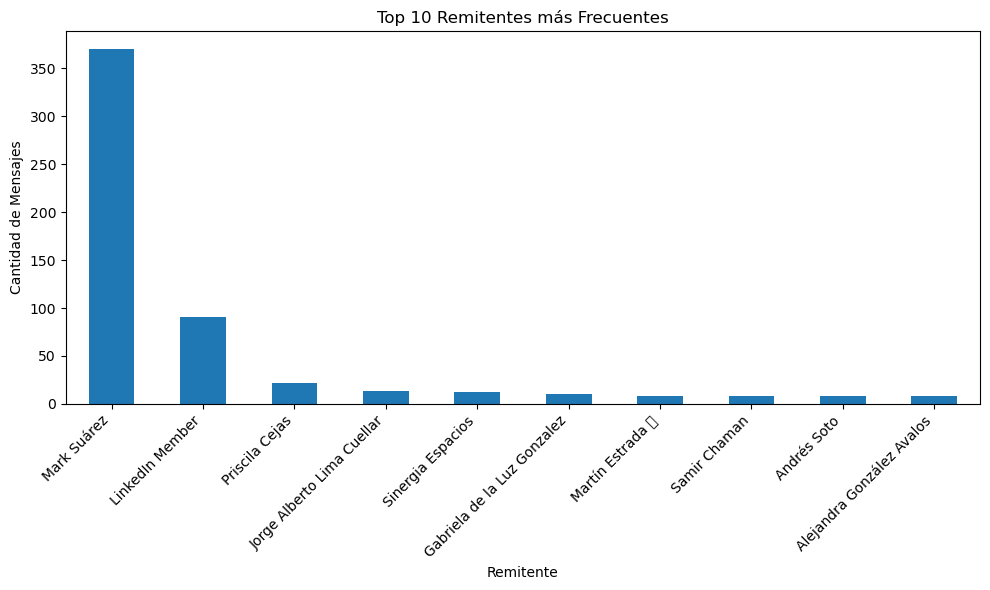

In [43]:
# Configura el tamaño de la figura para el gráfico de barras.
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras con los 10 remitentes más frecuentes.
top_sender.plot(kind='bar')

# Establece el título del gráfico.
plt.title('Top 10 Remitentes más Frecuentes')

# Etiqueta el eje X con 'Remitente'.
plt.xlabel('Remitente')

# Etiqueta el eje Y con 'Cantidad de Mensajes'.
plt.ylabel('Cantidad de Mensajes')

# Rota las etiquetas del eje X 45 grados para una mejor legibilidad y las alinea a la derecha.
plt.xticks(rotation=45, ha='right')

# Ajusta automáticamente los márgenes para evitar que las etiquetas se superpongan.
plt.tight_layout()


In [44]:
# Muestra las primeras 25 filas de la columna 'CONTENT' para revisar el contenido de los mensajes.
df['CONTENT'].head(25)

0                                                     👍
1                                      Igualmente, Mark
2                                             Saluditos
3     Hola Mark ¿Como estas? Quería molestarte y tra...
4     Hola Mark, este mensaje es para notificarle qu...
5     El le escribira para detallar el servicio y pr...
6     Con gusto atenderemos nos contactamos con uste...
7     agregame al whatsapp y me explicas más 2223811533
8     Le parece agendar una llamadita para explayar ...
9     Hola de nuevo Mark! Le comento  Utilizariamos ...
10                                         de que tipo?
11    Su perfil llamo mi atención y me preguntaba si...
12                        Hola Mark, un gusto saludarlo
13                               Hola Mark, conectemos!
14    <p class="spinmail-quill-editor__spin-break">H...
15    Que tal? Soy Antonio Fernández CEO y Co Fundad...
16    Hola Mark. Acabo de darme cuenta de que ambos ...
17    Hola Mark; Que gusto saludarte nuevamente 

In [21]:
# Elimina las filas del DataFrame donde la columna 'CONTENT' tiene valores nulos,
# dejando solo los registros que contienen mensajes en la columna 'CONTENT'.
df_cleaned_content = cleaned_df.dropna(subset=['CONTENT'])

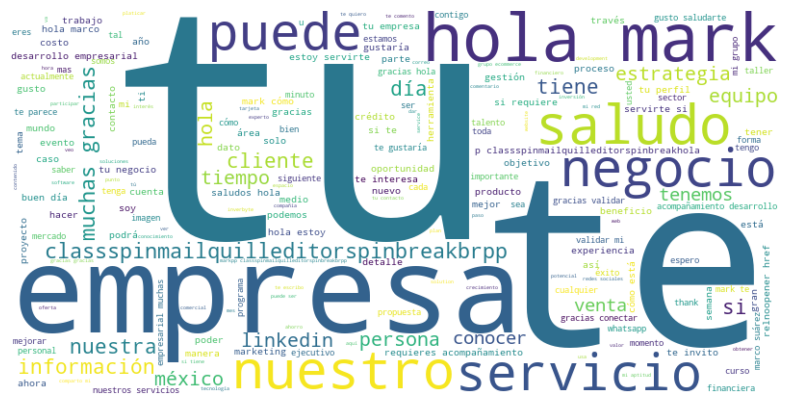

In [22]:
# Lista manual de stopwords en español
manual_stopwords = [
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", 
    "un", "para", "con", "no", "una", "su", "al", "es", "lo", "como", "más", 
    "pero", "sus", "le", "ya", "o", "fue", "este", "ha", "sí", "porque", 
    "esta", "son", "entre", "cuando", "muy", "sin", "sobre", "también", "me", 
    "hasta", "hay", "donde", "quien", "desde", "todo", "nos", "durante", "todos", 
    "uno", "les", "ni", "contra", "otros", "ese", "eso", "ante", "ellos", 
    "e", "esto", "mí", "antes", "algunos", "qué", "unos", "yo", "otro", 
    "otras", "otra", "él", "tanto", "esa", "estos", "mucho", "quienes", 
    "nada", "muchos", "cual", "poco", "ella", "estar", "estas", "algunas", 
    "algo", "nosotros"
]

# Función modificada para limpiar el contenido
def clean_text_manual(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, URLs, menciones y números
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|\d+', '', text)
    text = re.sub(r'[^a-záéíóúüñ\s]', '', text)
    # Tokenización y eliminación de manual_stopwords
    words = text.split()
    words = [word for word in words if word not in manual_stopwords]
    return ' '.join(words)

# Aplicar la función de limpieza a la columna CONTENT
df_cleaned_content['CONTENT_CLEAN'] = df_cleaned_content['CONTENT'].apply(clean_text_manual)

# Unir todo el texto limpio en una sola cadena
all_text_manual = ' '.join(df_cleaned_content['CONTENT_CLEAN'])

# Generar el Word Cloud
wordcloud_manual = WordCloud(width=800, height=400, background_color='white').generate(all_text_manual)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_manual, interpolation='bilinear')
plt.axis('off')
plt.show()


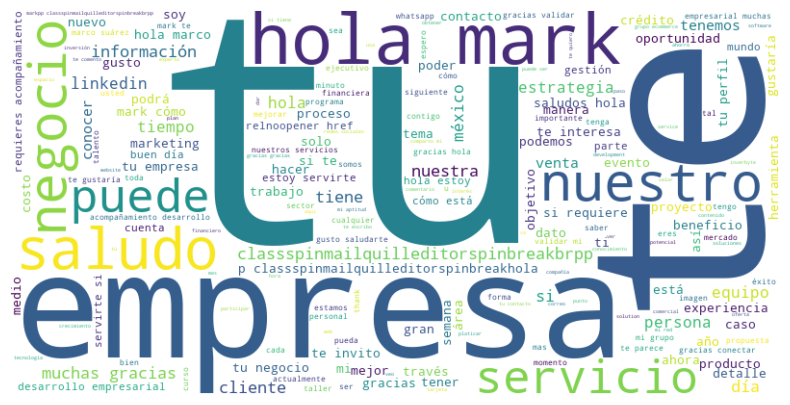

In [23]:
# Creación de gráficos para visualizar los datos
# Función para eliminar etiquetas HTML del texto
def remove_html_tags(text):
    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', text)
    return text

# Aplicar la limpieza adicional para remover código HTML
df_cleaned_content['CONTENT_CLEAN'] = df_cleaned_content['CONTENT_CLEAN'].apply(remove_html_tags)

# Unir todo el texto limpio en una sola cadena
all_text_no_html = ' '.join(df_cleaned_content['CONTENT_CLEAN'])

# Generar el Word Cloud sin HTML
wordcloud_no_html = WordCloud(width=800, height=400, background_color='white').generate(all_text_no_html)

# Mostrar el nuevo Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_html, interpolation='bilinear')
plt.axis('off')
plt.show()


In [25]:
# Paso 1: Convertir la cadena de texto a una lista de palabras
palabras = re.findall(r'\b\w+\b', all_text_no_html.lower())

# Paso 2: Contar la frecuencia de cada palabra
contador_palabras = Counter(palabras)

# Paso 3: Obtener las palabras más comunes (por ejemplo, las 100 más comunes)
palabras_comunes = contador_palabras.most_common(100)

# Paso 4: Crear un DataFrame con las palabras y sus frecuencias
df_palabras_comunes = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])

# Paso 5: Exportar a un archivo Excel
df_palabras_comunes.to_excel('palabras_comunes.xlsx', index=False)

print("Archivo Excel exportado con las palabras y su frecuencia.")



Archivo Excel exportado con las palabras y su frecuencia.


In [27]:
# Paso 1: Convertir la cadena de texto a una lista de palabras
palabras = re.findall(r'\b\w+\b', all_text_no_html.lower())

# Paso 2: Contar la frecuencia de cada palabra
contador_palabras = Counter(palabras)

# Paso 3: Obtener las palabras más comunes (por ejemplo, las 100 más comunes)
palabras_comunes = contador_palabras.most_common(100)

# Paso 4: Extraer solo las palabras (sin las frecuencias) en una lista
solo_palabras = [palabra for palabra, _ in palabras_comunes]

# Paso 5: Unir todas las palabras en una sola cadena, separadas por espacios
cadena_palabras_comunes = ' '.join(solo_palabras)

# Paso 6: Crear un DataFrame con una sola fila que contenga la cadena de palabras
df_palabras_comunes = pd.DataFrame([cadena_palabras_comunes], columns=['Palabras Comunes'])

# Paso 7: Exportar a un archivo Excel
df_palabras_comunes.to_excel('palabras_comunes.xlsx', index=False)

print("Archivo Excel exportado con las palabras más comunes en una sola línea.")


Archivo Excel exportado con las palabras más comunes en una sola línea.


In [28]:
# Crea un nuevo DataFrame con una lista que contiene el texto 'all_text_no_html',
# y lo almacena en una columna llamada 'texto'.
new_df = pd.DataFrame([all_text_no_html], columns=['texto'])

# Exporta el nuevo DataFrame a un archivo CSV llamado 'texto.csv', sin incluir el índice.
new_df.to_csv('texto.csv', index=False)

In [29]:
# Diccionarios manuales de palabras positivas y negativas
positive_words = [
    "bueno", "excelente", "genial", "feliz", "fantástico", "maravilloso", "positivo", "agradable", 
    "gracias", "bien", "mejor", "amable", "felicidades", "encantado", "contento", "optimista"
]

negative_words = [
    "malo", "terrible", "horrible", "triste", "negativo", "lamentable", "peor", "mal", 
    "odio", "fallo", "fallar", "desastroso", "molesto", "frustrado", "difícil", "preocupado"
]

# Función para calcular la polaridad manualmente
def calculate_polarity(text):
    words = text.split()
    polarity_score = 0
    for word in words:
        if word in positive_words:
            polarity_score += 1
        elif word in negative_words:
            polarity_score -= 1
    return polarity_score

# Aplicar la función de polaridad a cada mensaje limpio
df_cleaned_content['polarity_score'] = df_cleaned_content['CONTENT_CLEAN'].apply(calculate_polarity)

# Clasificar el sentimiento según la polaridad
df_cleaned_content['sentiment'] = df_cleaned_content['polarity_score'].apply(
    lambda x: 'positivo' if x > 0 else ('negativo' if x < 0 else 'neutral')
)

# Contar el número de mensajes por tipo de sentimiento
sentiment_counts_manual = df_cleaned_content['sentiment'].value_counts()

sentiment_counts_manual


sentiment
neutral     672
positivo    404
negativo      4
Name: count, dtype: int64

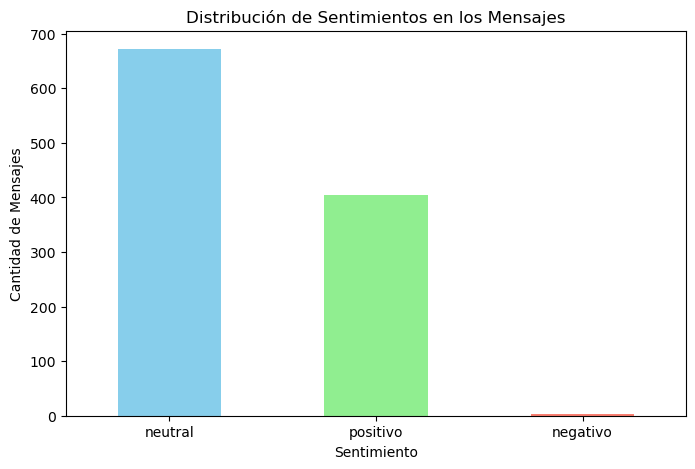

In [45]:
# Configura el tamaño de la figura para el gráfico de barras.
plt.figure(figsize=(8, 5))

# Crea un gráfico de barras para mostrar la distribución de los sentimientos en los mensajes,
# utilizando colores personalizados para cada barra.
sentiment_counts_manual.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])

# Establece el título del gráfico.
plt.title('Distribución de Sentimientos en los Mensajes')

# Etiqueta el eje X con 'Sentimiento'.
plt.xlabel('Sentimiento')

# Etiqueta el eje Y con 'Cantidad de Mensajes'.
plt.ylabel('Cantidad de Mensajes')

# Establece las etiquetas del eje X sin rotación para que queden horizontales.
plt.xticks(rotation=0)

# Muestra el gráfico.
plt.show()



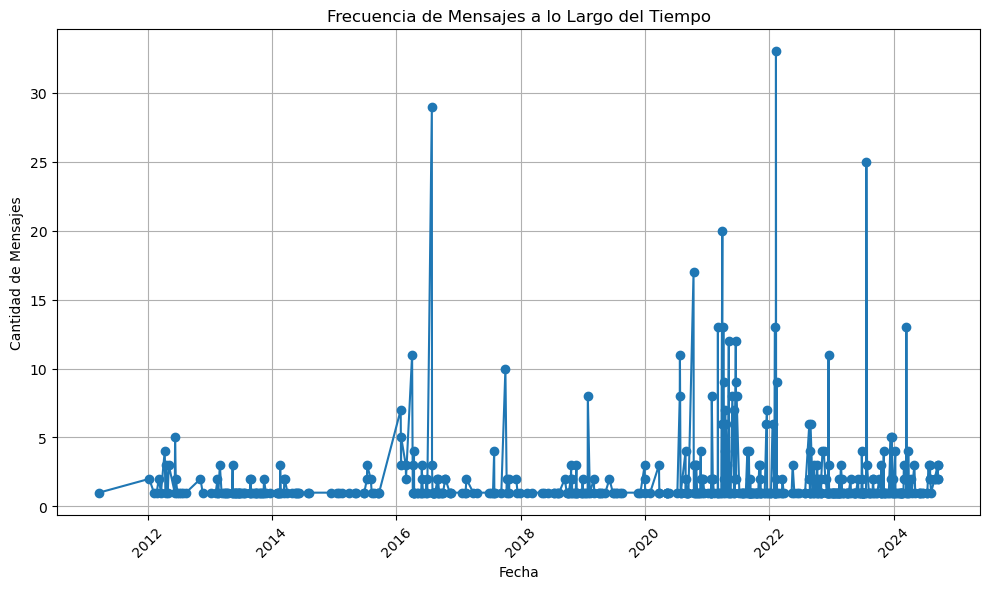

In [46]:
# Agrupa los datos por fecha (sin la hora) y cuenta el número de mensajes por día.
messages_per_day = cleaned_df.groupby(cleaned_df['DATE'].dt.date).size()

# Genera el gráfico de línea para mostrar la frecuencia de mensajes por día.
plt.figure(figsize=(10, 6))
messages_per_day.plot(kind='line', marker='o')

# Establece el título del gráfico.
plt.title('Frecuencia de Mensajes a lo Largo del Tiempo')

# Etiqueta el eje X con 'Fecha'.
plt.xlabel('Fecha')

# Etiqueta el eje Y con 'Cantidad de Mensajes'.
plt.ylabel('Cantidad de Mensajes')

# Activa la cuadrícula para facilitar la visualización de los datos.
plt.grid(True)

# Rota las etiquetas del eje X 45 grados para una mejor legibilidad.
plt.xticks(rotation=45)

# Ajusta los márgenes del gráfico para evitar que las etiquetas se superpongan.
plt.tight_layout()

# Muestra el gráfico.
plt.show()


In [47]:
# Muestra la serie que contiene la cantidad de mensajes por día.
messages_per_day

DATE
2011-03-22    1
2012-01-11    2
2012-02-08    1
2012-02-24    1
2012-03-07    2
             ..
2024-08-29    2
2024-09-14    3
2024-09-15    2
2024-09-16    3
2024-09-17    2
Length: 535, dtype: int64

In [48]:
# Intenta exportar la serie de mensajes por día a un archivo CSV llamado 'mensajes.csv'.
# Sin embargo, el parámetro 'index=False' no es válido para una serie; se requiere convertirla en un DataFrame primero.
# Para corregirlo, se puede convertir la serie a un DataFrame y luego exportar.

messages_per_day_df = messages_per_day.reset_index()
messages_per_day_df.columns = ['Fecha', 'Cantidad de Mensajes']

# Ahora exporta el DataFrame a un archivo CSV
messages_per_day_df.to_csv('mensajes.csv', index=False)


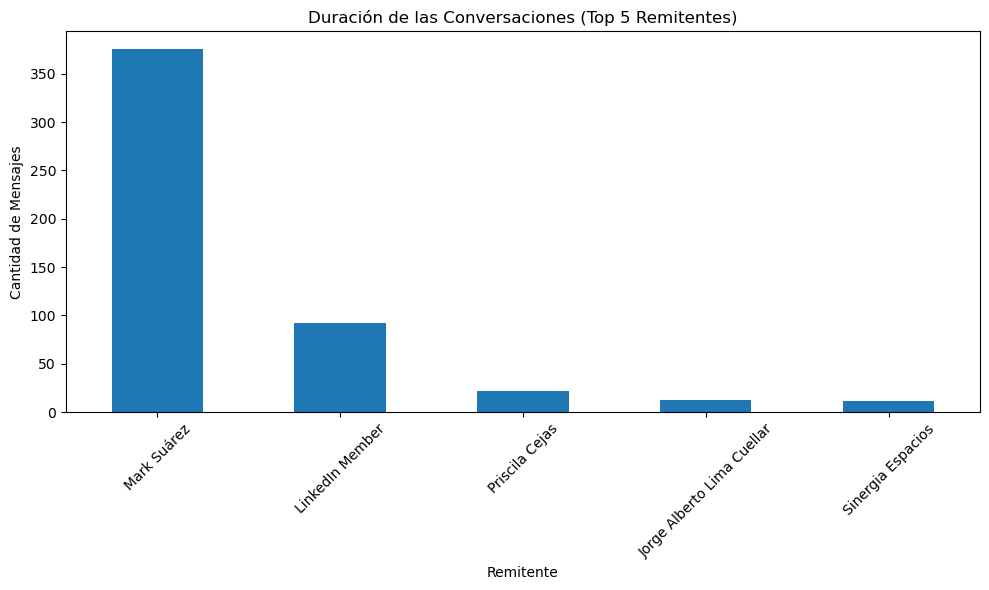

In [49]:
# Calcula la longitud total de las conversaciones por remitente, considerando la cantidad de mensajes por conversación.
# Primero, agrupa los datos por 'FROM' y 'CONVERSATION ID' para contar el número de mensajes por conversación,
# luego suma estas cantidades para cada remitente, ordena de mayor a menor y selecciona los 5 remitentes principales.
conversation_lengths_by_sender = df.groupby(['FROM', 'CONVERSATION ID']).size().groupby(level=0).sum().sort_values(ascending=False).head(5)

# Genera un gráfico de barras para mostrar la duración de las conversaciones de los 5 remitentes principales.
plt.figure(figsize=(10, 6))
conversation_lengths_by_sender.plot(kind='bar')

# Establece el título del gráfico.
plt.title('Duración de las Conversaciones (Top 5 Remitentes)')

# Etiqueta el eje X con 'Remitente'.
plt.xlabel('Remitente')

# Etiqueta el eje Y con 'Cantidad de Mensajes'.
plt.ylabel('Cantidad de Mensajes')

# Rota las etiquetas del eje X para que sean más legibles.
plt.xticks(rotation=45)

# Ajusta los márgenes del gráfico para evitar superposición de elementos.
plt.tight_layout()

# Muestra el gráfico.
plt.show()